[[250. 400. 400. ... 400. 400. 350.]
 [100. 100. 100. ... 100. 100. 300.]
 [100. 100. 100. ... 100. 100. 300.]
 ...
 [100. 100. 100. ... 100. 100. 300.]
 [100. 100. 100. ... 100. 100. 300.]
 [150. 200. 200. ... 200. 200. 250.]]


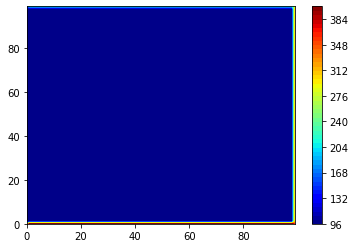

In [1]:
import numpy as np
import matplotlib.pyplot as plt

maxIter = 500
lenX = 100
lenY = 100
delta = 1
final_error = 0.001

lenght_x = 0.1 #m
lenght_y = 0.1 #m
dx = lenght_x / lenX
dy = lenght_y / lenY


T_initial = 100 #C
T_fixed = 100 #C
T_AB = 1 * T_fixed
T_BC = 2 * T_fixed 
T_CD = 3 * T_fixed
T_DA = 4 * T_fixed 
colourMap = plt.cm.jet
colorinterpolation = 50

X, Y = np.meshgrid (np.arange(0, lenX), np.arange(0,lenY))
T = np.empty((lenX, lenY))
T.fill(T_initial)
T[(lenX-1):,:] = T_BC
T[:1,:] = T_DA
T[:,(lenY-1):] = T_CD
T[:,:1] = T_AB
T[0,0] = (T[1,0] + T[0,1])/2
T[0,lenY-1] = (T[0,lenY-2] + T[1,lenY-1])/2
T[lenX-1, 0] = (T[lenX-2,0]+T[lenX-1,1])/2
T[lenX-1, lenY-1] = (T[lenX-2, lenY-1] + T [lenX-1, lenY-2])/2
T_pr = T.copy()
print(T)
plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
plt.colorbar()

In [4]:
#Jacobi method
error = 1
const = 2/(lenght_x/lenX)**2 + 2/(lenght_y/lenY)**2
T_err = []
counter = 0
while (error > final_error):
    for i in range (1, lenX-1, 1):
        for j in range (1, lenY-1, 1):
            T[i,j] = 0.25 * (T_pr[i+1][j]+T_pr[i-1][j]+T_pr[i][j+1]+T_pr[i][j-1])
    T_err = T - T_pr
    error = np.amax(T_err)
    T_pr = T.copy()
    counter+=1

plt.figure(figsize=(15, 15))  
plt.xlabel = 'x'
plt.ylabel = 'y'
colorinterpolation = 100
colourMap=plt.cm.jet            
plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
plt.colorbar()
plt.show()
print(counter)

KeyboardInterrupt: 

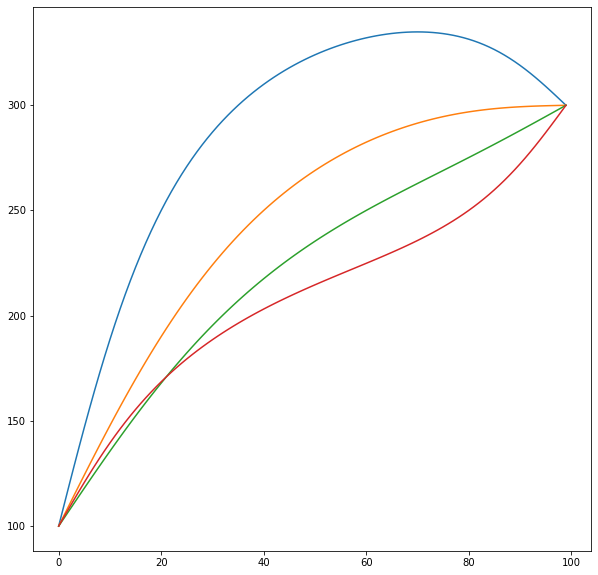

5668


In [8]:
plt.figure(figsize=(10, 10))  
plt.xlabel = 'x'
plt.ylabel = 'T'
plt.plot(T[20])
plt.plot(T[40])
plt.plot(T[60])
plt.plot(T[80])
plt.show()
print(counter)

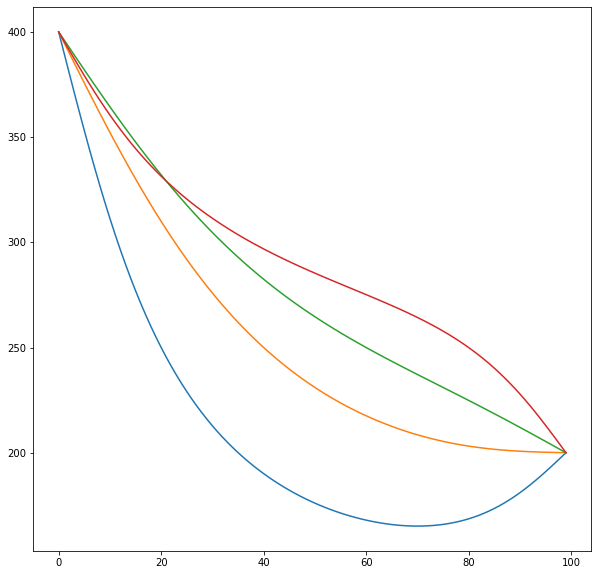

In [9]:
plt.figure(figsize=(10, 10))  
plt.xlabel = 'x'
plt.ylabel = 'y'
A = T[:,20].copy()
np.flip(A)
B = T[:,40].copy()
np.flip(B)
C = T[:,60].copy()
np.flip(C)
D = T[:,80].copy()
np.flip(D)
plt.plot(A)
plt.plot(B)
plt.plot(C)
plt.plot(D)
plt.show()

[[250. 400. 400. ... 400. 400. 350.]
 [100. 250. 250. ... 250. 250. 300.]
 [100. 250. 250. ... 250. 250. 300.]
 ...
 [100. 250. 250. ... 250. 250. 300.]
 [100. 250. 250. ... 250. 250. 300.]
 [150. 200. 200. ... 200. 200. 250.]]


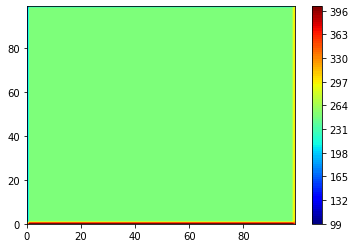

In [10]:
X, Y = np.meshgrid (np.arange(0, lenX), np.arange(0,lenY))
T = np.empty((lenX, lenY))
T.fill(T_initial)
T[(lenX-1):,:] = T_BC
T[:1,:] = T_DA
T[:,(lenY-1):] = T_CD
T[:,:1] = T_AB
T[0,0] = (T[1,0] + T[0,1])/2
T[0,lenY-1] = (T[0,lenY-2] + T[1,lenY-1])/2
T[lenX-1, 0] = (T[lenX-2,0]+T[lenX-1,1])/2
T[lenX-1, lenY-1] = (T[lenX-2, lenY-1] + T [lenX-1, lenY-2])/2
T_pr = T.copy()
print(T)
plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
plt.colorbar()

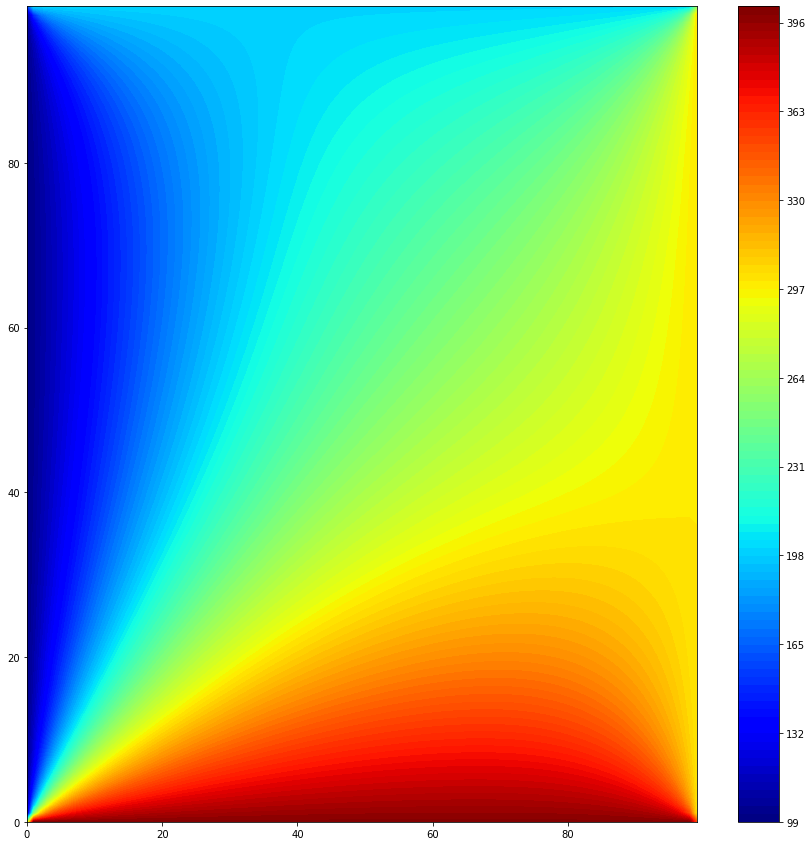

1274


In [11]:
#Seidel method
error = 1
const = 2/(lenght_x/lenX)**2 + 2/(lenght_y/lenY)**2
T_err = []
counter = 0
while (error > final_error):
    for i in range (1, lenX-1, 1):
        for j in range (1, lenY-1, 1):
            T[i,j] = 0.25 * (T[i-1][j]+T_pr[i+1][j]+T[i][j-1]+T_pr[i][j+1])
    T_err = T - T_pr
    error = np.amax(T_err)/100
    T_pr = T.copy()
    counter+=1
plt.figure(figsize=(15, 15))  
plt.xlabel = 'x'
plt.ylabel = 'y'
colorinterpolation = 100
colourMap=plt.cm.jet            
plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
plt.colorbar()
plt.show()
print(counter)

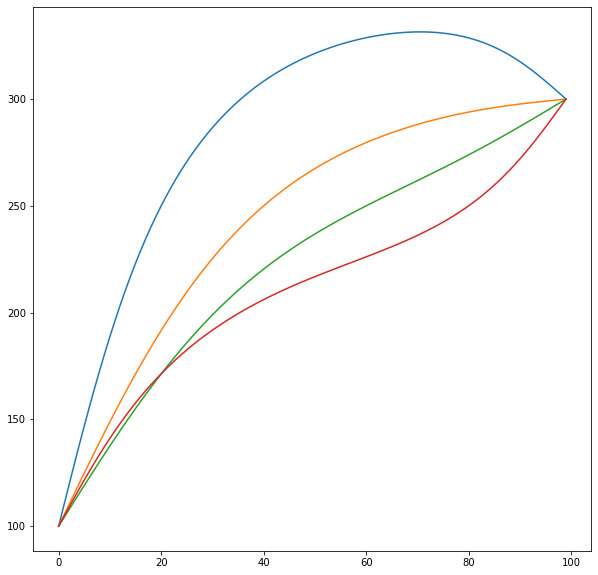

1274


In [12]:
plt.figure(figsize=(10, 10))  
plt.xlabel = 'x'
plt.ylabel = 'T'
plt.plot(T[20])
plt.plot(T[40])
plt.plot(T[60])
plt.plot(T[80])
plt.show()
print(counter)

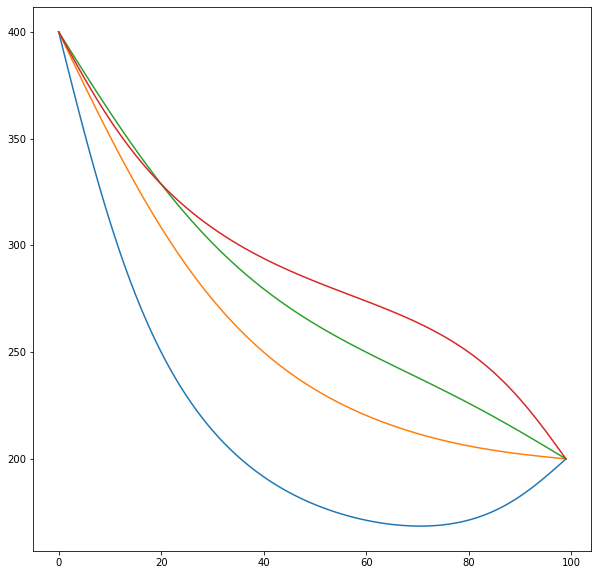

In [13]:
plt.figure(figsize=(10, 10))  
plt.xlabel = 'x'
plt.ylabel = 'y'
A = T[:,20].copy()
np.flip(A)
B = T[:,40].copy()
np.flip(B)
C = T[:,60].copy()
np.flip(C)
D = T[:,80].copy()
np.flip(D)
plt.plot(A)
plt.plot(B)
plt.plot(C)
plt.plot(D)
plt.show()

[[100. 100. 100. ... 100. 100. 100.]
 [100.  50.  50. ...  50.  50. 100.]
 [100.  50.  50. ...  50.  50. 100.]
 ...
 [100.  50.  50. ...  50.  50. 100.]
 [100.  50.  50. ...  50.  50. 100.]
 [100. 100. 100. ... 100. 100. 100.]]


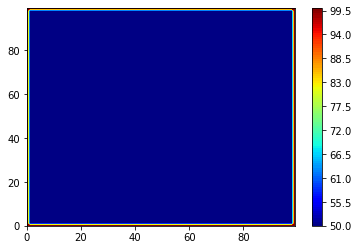

In [14]:
X, Y = np.meshgrid (np.arange(0, lenX), np.arange(0,lenY))
T = np.empty((lenX, lenY))
T.fill(T_initial)
T[(lenX-1):,:] = T_BC
T[:1,:] = T_DA
T[:,(lenY-1):] = T_CD
T[:,:1] = T_AB
T[0,0] = (T[1,0] + T[0,1])/2
T[0,lenY-1] = (T[0,lenY-2] + T[1,lenY-1])/2
T[lenX-1, 0] = (T[lenX-2,0]+T[lenX-1,1])/2
T[lenX-1, lenY-1] = (T[lenX-2, lenY-1] + T [lenX-1, lenY-2])/2
T_pr = T.copy()
print(T)
plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
plt.colorbar()

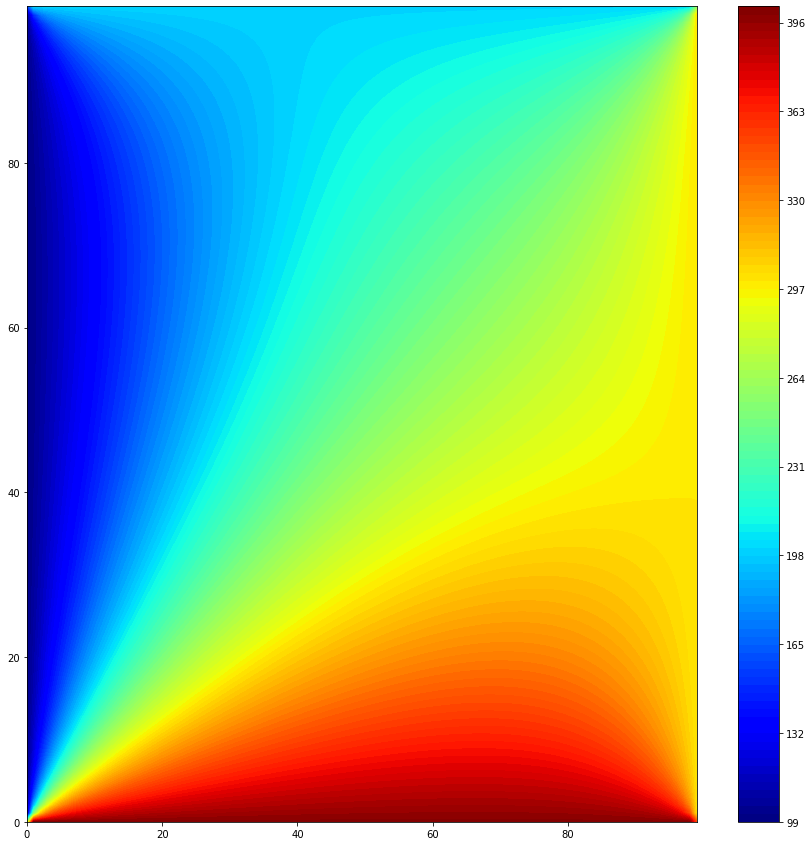

313


In [70]:
#Relaxation method
error = 1
const = 2/(lenght_x/lenX)**2 + 2/(lenght_y/lenY)**2
T_err = []
a = 1.8
counter = 0
while (error > final_error):
    for i in range (1, lenX-1, 1):
        for j in range (1, lenY-1, 1):
            T[i,j] = (1-a)*T_pr[i][j] + a * 0.25 * (T[i][j-1]+T_pr[i][j+1]+T[i-1][j]+T_pr[i+1][j])
    T_err = T - T_pr
    error = np.amax(T_err)/100
    T_pr = T.copy()
    counter+=1

plt.figure(figsize=(15, 15))  
plt.xlabel = 'x'
plt.ylabel = 'y'
colorinterpolation = 100
colourMap=plt.cm.jet            
plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
plt.colorbar()
plt.show()
print(counter)

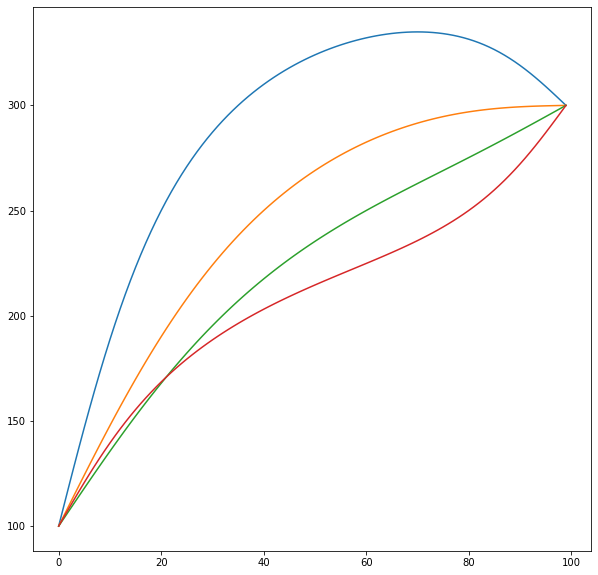

145


In [16]:
plt.figure(figsize=(10, 10))  
plt.xlabel = 'x'
plt.ylabel = 'T'
plt.plot(T[20])
plt.plot(T[40])
plt.plot(T[60])
plt.plot(T[80])
plt.show()
print(counter)

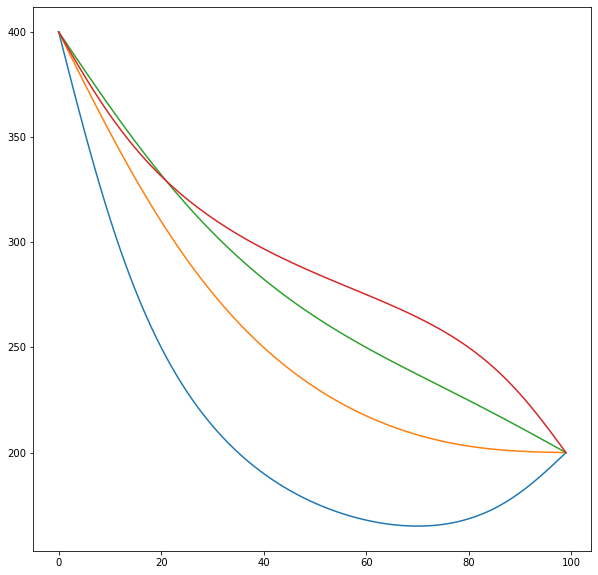

In [17]:
plt.figure(figsize=(10, 10))  
plt.xlabel = 'x'
plt.ylabel = 'y'
A = T[:,20].copy()
np.flip(A)
B = T[:,40].copy()
np.flip(B)
C = T[:,60].copy()
np.flip(C)
D = T[:,80].copy()
np.flip(D)
plt.plot(A)
plt.plot(B)
plt.plot(C)
plt.plot(D)
plt.show()

[[100. 100. 100. ... 100. 100. 100.]
 [100.  50.  50. ...  50.  50. 100.]
 [100.  50.  50. ...  50.  50. 100.]
 ...
 [100.  50.  50. ...  50.  50. 100.]
 [100.  50.  50. ...  50.  50. 100.]
 [100. 100. 100. ... 100. 100. 100.]]


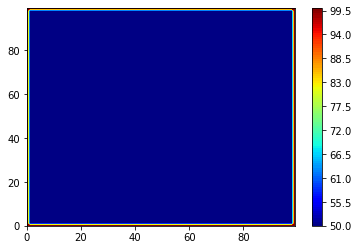

In [17]:
X, Y = np.meshgrid (np.arange(0, lenX), np.arange(0,lenY))
T = np.empty((lenX, lenY))
T.fill(T_initial)
T[(lenX-1):,:] = T_BC
T[:1,:] = T_DA
T[:,(lenY-1):] = T_CD
T[:,:1] = T_AB
T[0,0] = (T[1,0] + T[0,1])/2
T[0,lenY-1] = (T[0,lenY-2] + T[1,lenY-1])/2
T[lenX-1, 0] = (T[lenX-2,0]+T[lenX-1,1])/2
T[lenX-1, lenY-1] = (T[lenX-2, lenY-1] + T [lenX-1, lenY-2])/2
T_pr = T.copy()
print(T)
plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
plt.colorbar()

In [25]:
Mean20 = []
Mean40 = []
Mean60 = []
Mean80 = []
Counter = []
for lenX1 in range (10, 110, 10):
    X, Y = np.meshgrid (np.arange(0, lenX1), np.arange(0,lenX1))
    T = np.empty((lenX1, lenX1))
    T.fill(T_initial)
    T[(lenX1-1):,:] = T_BC
    T[:1,:] = T_DA
    T[:,(lenX1-1):] = T_CD
    T[:,:1] = T_AB
    T[0,0] = (T[1,0] + T[0,1])/2
    T[0,lenX1-1] = (T[0,lenX1-2] + T[1,lenX1-1])/2
    T[lenX1-1, 0] = (T[lenX1-2,0]+T[lenX1-1,1])/2
    T[lenX1-1, lenX1-1] = (T[lenX1-2, lenX1-1] + T [lenX1-1, lenX1-2])/2
    T_pr = T.copy()
    error = 1
    T_err = []
    counter = 0
    a = 1 + 24 * 1/30
    while (error > final_error):
        for i in range (1, lenX1-1, 1):
            for j in range (1, lenX1-1, 1):
                T[i,j] = (1-a)*T_pr[i][j] + a * 0.25 * (T[i][j-1]+T_pr[i][j+1]+T[i-1][j]+T_pr[i+1][j])
        T_err = T - T_pr
        error = np.amax(T_err)/100
        T_pr = T.copy()
        counter+=1
    Counter.append(counter)
    Mean20.append(np.mean(T[int(lenX1/5)]))
    Mean40.append(np.mean(T[int(2*lenX1/5)]))
    Mean60.append(np.mean(T[int(3*lenX1/5)]))
    Mean80.append(np.mean(T[int(4*lenX1/5)]))


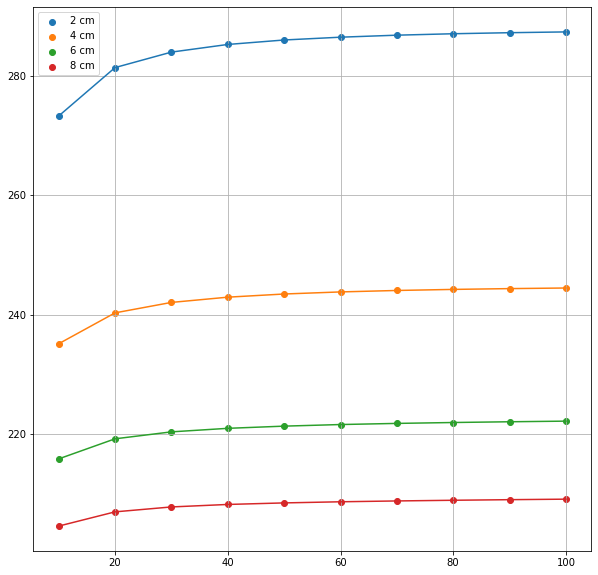

In [26]:
A = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(A, Mean20)
plt.plot(A, Mean40)
plt.plot(A, Mean60)
plt.plot(A, Mean80)
plt.scatter(A, Mean20, label = '2 cm')
plt.scatter(A, Mean40, label = '4 cm')
plt.scatter(A, Mean60, label = '6 cm')
plt.scatter(A, Mean80, label = '8 cm')
plt.legend()

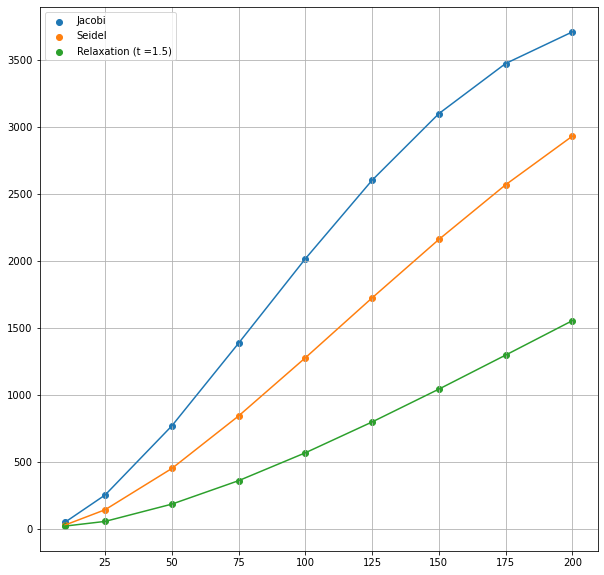

In [28]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot([10, 25, 50, 75, 100, 125, 150, 175, 200],[47, 250, 766, 1383, 2013, 2599,3096, 3470, 3706])
plt.plot([10, 25,  50, 75,  100, 125, 150, 175, 200],[26, 140, 448, 840, 1274,1721,2157,2565, 2928])
plt.plot([10, 25, 50, 75, 100, 125, 150, 175, 200],[18, 53, 182,357, 565, 795, 1040, 1294, 1551])
plt.scatter([10, 25, 50, 75, 100, 125, 150, 175, 200],[47, 250, 766, 1383, 2013, 2599,3096, 3470, 3706], label = 'Jacobi')
plt.scatter([10, 25,  50, 75,  100, 125, 150, 175, 200],[26, 140, 448, 840, 1274,1721,2157,2565, 2928], label = 'Seidel')
plt.scatter([10, 25, 50, 75, 100, 125, 150, 175, 200],[18, 53, 182,357, 565, 795, 1040, 1294, 1551], label = 'Relaxation (t =1.5)')
plt.legend()

In [34]:
Counter = []
for o in range (110, 200, 5):
    lenX1 = 100
    X, Y = np.meshgrid (np.arange(0, lenX1), np.arange(0,lenX1))
    T = np.empty((lenX1, lenX1))
    T.fill(T_initial)
    T[(lenX1-1):,:] = T_BC
    T[:1,:] = T_DA
    T[:,(lenX1-1):] = T_CD
    T[:,:1] = T_AB
    T[0,0] = (T[1,0] + T[0,1])/2
    T[0,lenX1-1] = (T[0,lenX1-2] + T[1,lenX1-1])/2
    T[lenX1-1, 0] = (T[lenX1-2,0]+T[lenX1-1,1])/2
    T[lenX1-1, lenX1-1] = (T[lenX1-2, lenX1-1] + T [lenX1-1, lenX1-2])/2
    T_pr = T.copy()
    error = 1
    T_err = []
    counter = 0
    a = o/100
    while (error > final_error):
        for i in range (1, lenX1-1, 1):
            for j in range (1, lenX1-1, 1):
                T[i,j] = (1-a)*T_pr[i][j] + a * 0.25 * (T[i][j-1]+T_pr[i][j+1]+T[i-1][j]+T_pr[i+1][j])
        T_err = T - T_pr
        error = np.amax(T_err)/100
        T_pr = T.copy()
        counter+=1
    print(counter)
    Counter.append(counter)


1106
1028
954
883
815
749
686
624
565
507
450
395
340
285
230
174
145
211


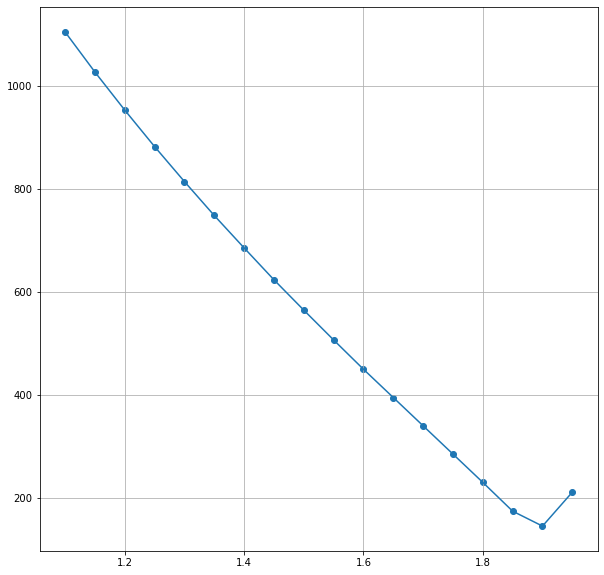

In [35]:
plt.figure(figsize=(10, 10))
plt.grid()
C = [1.10, 1.15, 1.20, 1.25, 1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95]
plt.plot(C, Counter)

plt.scatter(C, Counter)

In [ ]:
Counter = []
X1 = []
for o in range (11, 201, 10):
    lenX1 = o
    X, Y = np.meshgrid (np.arange(0, lenX1), np.arange(0,lenX1))
    T = np.empty((lenX1, lenX1))
    T.fill(T_initial)
    T[(lenX1-1):,:] = T_BC
    T[:1,:] = T_DA
    T[:,(lenX1-1):] = T_CD
    T[:,:1] = T_AB
    T[0,0] = (T[1,0] + T[0,1])/2
    T[0,lenX1-1] = (T[0,lenX1-2] + T[1,lenX1-1])/2
    T[lenX1-1, 0] = (T[lenX1-2,0]+T[lenX1-1,1])/2
    T[lenX1-1, lenX1-1] = (T[lenX1-2, lenX1-1] + T [lenX1-1, lenX1-2])/2
    T_pr = T.copy()
    error = 1
    T_err = []
    counter = 0
    a = 1.8
    while (error > final_error):
        for i in range (1, lenX1-1, 1):
            for j in range (1, lenX1-1, 1):
                T[i,j] = 0.25 * (T_pr[i+1][j]+T_pr[i-1][j]+T_pr[i][j+1]+T_pr[i][j-1])
        T_err = T - T_pr
        error = np.amax(T_err)
        T_pr = T.copy()
        counter+=1
    X1.append(o)
    print(lenX1)
    print(T[int(lenX1/2)+1][int(lenX1/2)+1])
    Counter.append(250 - T[int(lenX1/2)][int(lenX1/2)])
plt.plot(X1, Counter)

11
249.99827935110005
21
249.99230163240577
31
249.98208680973605
41
249.96781008483106
51
249.94963667454198
61
249.92739113153402


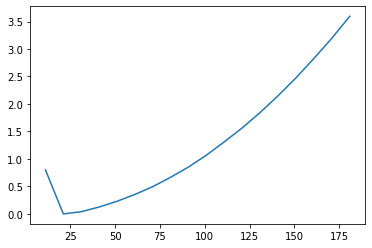

In [65]:
plt.plot(X1, Counter)

In [66]:
Counter

[0.8000096968661694,
 -0.0024434787526672608,
 0.03782711420043938,
 0.12330983839149212,
 0.22768546857585648,
 0.35295945624062597,
 0.4947008635946588,
 0.6663274507942276,
 0.8532809901353176,
 1.0699273660105177,
 1.3119912174272201,
 1.5655788552620322,
 1.8464890976277673,
 2.1512688900243973,
 2.4766796003875697,
 2.8295613053442707,
 3.1971835034790956,
 3.596660319563398]

In [63]:
int(201/2)

100

In [ ]:
#Relaxation method
error = 1
const = 2/(lenght_x/lenX)**2 + 2/(lenght_y/lenY)**2
T_err = []
a = 1.9
counter = 0
while (error > final_error):
    for i in range (1, lenX-1, 1):
        for j in range (1, lenY-1, 1):
            T[i,j] = (1-a)*T_pr[i][j] + a * 0.25 * (T[i][j-1]+T_pr[i][j+1]+T[i-1][j]+T_pr[i+1][j])
    T_err = T - T_pr
    error = np.amax(T_err)/100
    T_pr = T.copy()
    counter+=1
    plt.savefig()

plt.figure(figsize=(15, 15))  
plt.xlabel = 'x'
plt.ylabel = 'y'
colorinterpolation = 100
colourMap=plt.cm.jet            
plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
plt.colorbar()
plt.show()
print(counter)

In [12]:
import os
import imageio

In [10]:
#Relaxation method gif
error = 1
const = 2/(lenght_x/lenX)**2 + 2/(lenght_y/lenY)**2
T_err = []
a = 1.9
counter = 0
f = 0
filenames = []
while (error > final_error):
    for i in range (1, lenX-1, 1):
        for j in range (1, lenY-1, 1):
            T[i,j] = (1-a)*T_pr[i][j] + a * 0.25 * (T[i][j-1]+T_pr[i][j+1]+T[i-1][j]+T_pr[i+1][j])
    T_err = T - T_pr
    error = np.amax(T_err)/100
    T_pr = T.copy()
    counter+=1
    f+=1
    filename = f'{f}.png'
    filenames.append(filename)
    
    plt.figure(figsize=(15, 15))  
    plt.xlabel = 'x'
    plt.ylabel = 'y'
    colorinterpolation = 100
    colourMap=plt.cm.jet            
    plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
    plt.colorbar()
    plt.savefig(filename)
    plt.close()


print(counter)

313


In [11]:
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

NameError: name 'imageio' is not defined

In [ ]:
#Seidel method gif
error = 1
const = 2/(lenght_x/lenX)**2 + 2/(lenght_y/lenY)**2
T_err = []
a = 1.9
counter = 0
f = 0
filenames = []
while (error > final_error):
    for i in range (1, lenX-1, 1):
        for j in range (1, lenY-1, 1):
            T[i,j] = 0.25 * (T[i-1][j]+T_pr[i+1][j]+T[i][j-1]+T_pr[i][j+1])
    T_err = T - T_pr
    error = np.amax(T_err)/100
    T_pr = T.copy()
    counter+=1
    f+=1
    filename = f'{f}.png'
    filenames.append(filename)
    
    plt.figure(figsize=(15, 15))  
    plt.xlabel = 'x'
    plt.ylabel = 'y'
    colorinterpolation = 100
    colourMap=plt.cm.jet            
    plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
    plt.colorbar()
    plt.savefig(filename)
    plt.close()


print(counter)
with imageio.get_writer('seidel.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [ ]:
filenames = []
f = 0
for t in range (1, 2730, 5):
    filename = f'{t}.png'
    filenames.append(filename)
with imageio.get_writer('seidel.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)    

[[250. 400. 400. ... 400. 400. 350.]
 [100. 100. 100. ... 100. 100. 300.]
 [100. 100. 100. ... 100. 100. 300.]
 ...
 [100. 100. 100. ... 100. 100. 300.]
 [100. 100. 100. ... 100. 100. 300.]
 [150. 200. 200. ... 200. 200. 250.]]


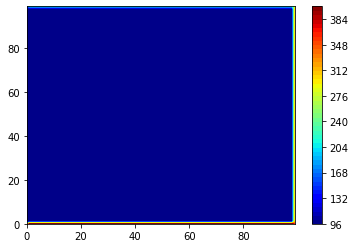

In [3]:
maxIter = 500
lenX = 100
lenY = 100
delta = 1
final_error = 0.0001

lenght_x = np.longdouble(0.1) #m
lenght_y = np.longdouble(0.1) #m
dx = lenght_x / lenX
dy = lenght_y / lenY


T_initial = np.longdouble(100) #C
T_fixed = np.longdouble(100) #C
T_AB = 1 * T_fixed
T_BC = 2 * T_fixed 
T_CD = 3 * T_fixed
T_DA = 4 * T_fixed 
colourMap = plt.cm.jet
colorinterpolation = 50

X, Y = np.meshgrid (np.arange(0, lenX), np.arange(0,lenY))
T = np.empty((lenX, lenY))
T.fill(T_initial)
T[(lenX-1):,:] = T_BC
T[:1,:] = T_DA
T[:,(lenY-1):] = T_CD
T[:,:1] = T_AB
T[0,0] = (T[1,0] + T[0,1])/2
T[0,lenY-1] = (T[0,lenY-2] + T[1,lenY-1])/2
T[lenX-1, 0] = (T[lenX-2,0]+T[lenX-1,1])/2
T[lenX-1, lenY-1] = (T[lenX-2, lenY-1] + T [lenX-1, lenY-2])/2
T_pr = T.copy()
print(T)
plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
plt.colorbar()

In [2]:
error = 1
const = 2/(lenght_x/lenX)**2 + 2/(lenght_y/lenY)**2
T_err = []
counter = 0
T_pr = T.copy()
k1 = 0
k2 = 0
k3 = 0
k4 = 0
dt = 0.001
filenames = []
f = 1
alpha = np.longdouble(2.5*10**(-4))
v1 = np.longdouble((alpha * dt)/(dx)**2)
v2 = np.longdouble((alpha * dt)/(dy)**2)
while (f < 6000):
    for i in range (1, lenX-1, 1):
        for j in range (1, lenY-1, 1):
            T[i][j] = T_pr[i][j] + v1*(T_pr[i+1][j]-2*T_pr[i][j]+T_pr[i-1][j]) + v2*(T_pr[i][j+1]-2*T_pr[i][j]+T_pr[i][j-1])
    T_pr = T.copy()
    counter+=1
    f+=1



In [ ]:
print(counter)
with imageio.get_writer('temp.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [4]:
error = 1
const = 2/(lenght_x/lenX)**2 + 2/(lenght_y/lenY)**2
T_err = []
counter = 0
T_pr = T.copy()
k1 = 0
k2 = 0
k3 = 0
k4 = 0
dt = 0.001
filenames = []
f = 0
alpha = np.longdouble(2.5*10**(-4))
v1 = np.longdouble((alpha * dt)/(dx)**2)
v2 = np.longdouble((alpha * dt)/(dy)**2)
while (f < 2820):
    for i in range (1, lenX-1, 1):
        for j in range (1, lenY-1, 1):
            T[i][j] = T_pr[i][j] + v1*(T_pr[i+1][j]-2*T_pr[i][j]+T_pr[i-1][j]) + v2*(T_pr[i][j+1]-2*T_pr[i][j]+T_pr[i][j-1])
    T_pr = T.copy()
    counter+=1
    f+=1
    
    



In [ ]:
error = 1
const = 2/(lenght_x/lenX)**2 + 2/(lenght_y/lenY)**2
T_err = []
counter = 0
T_pr = T.copy()
k1 = 0
k2 = 0
k3 = 0
k4 = 0
dt = 0.001
filenames = []
f = 6000
alpha = np.longdouble(2.5*10**(-4))
v1 = np.longdouble((alpha * dt)/(dx)**2)
v2 = np.longdouble((alpha * dt)/(dy)**2)
while (error > final_error):
    for i in range (1, lenX-1, 1):
        for j in range (1, lenY-1, 1):
            T[i][j] = T_pr[i][j] + v1*(T_pr[i+1][j]-2*T_pr[i][j]+T_pr[i-1][j]) + v2*(T_pr[i][j+1]-2*T_pr[i][j]+T_pr[i][j-1])
    T_err = T - T_pr
    error = np.amax(T_err)
    T_pr = T.copy()
    counter+=1
    f+=1
    if (f%100 == 0.):
        filenames.append(f'{int(f/10)}.png')
    
    plt.figure(figsize=(15, 15)) 
    if (int(dt*1000)*int((f+1)*100) > 1000):
        plt.title(label  = ((str(round((dt)*(f+1)*100, 1))+" sec")),  fontsize=40, color='black')
    else:
        plt.title(label  = (str(int(dt*1000)*int((f+1)*100))+" msec"),  fontsize=40, color='black')
    colorinterpolation = 100
    colourMap=plt.cm.jet            
    plt.contourf(X, Y, T, colorinterpolation, cmap = colourMap) 
    plt.colorbar()
    plt.savefig(f'{int(f/10)}.png')
    plt.close()



In [21]:
filenames = [f'{int(1+f/10)}.png' for f in range (10, 6000, 10)]

In [22]:
filenames


['2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '25.png',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '30.png',
 '31.png',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '40.png',
 '41.png',
 '42.png',
 '43.png',
 '44.png',
 '45.png',
 '46.png',
 '47.png',
 '48.png',
 '49.png',
 '50.png',
 '51.png',
 '52.png',
 '53.png',
 '54.png',
 '55.png',
 '56.png',
 '57.png',
 '58.png',
 '59.png',
 '60.png',
 '61.png',
 '62.png',
 '63.png',
 '64.png',
 '65.png',
 '66.png',
 '67.png',
 '68.png',
 '69.png',
 '70.png',
 '71.png',
 '72.png',
 '73.png',
 '74.png',
 '75.png',
 '76.png',
 '77.png',
 '78.png',
 '79.png',
 '80.png',
 '81.png',
 '82.png',
 '83.png',
 '84.png',
 '85.png',
 '86.png',
 '87.png',
 '88.png',
 '89.png',
 '90.png',
 '91.png',
 '92.png',
 '93.pn

In [23]:
print(counter)
with imageio.get_writer('temp.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

5999
